In [1]:
%matplotlib inline
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 25 22:12:44 2018

@author: miaortizma
"""
import numpy as np
import itertools as it
import matplotlib.pyplot as plt

'''
Returns the array after insertion
and the number of comparations, swaps and other instructions made
'''
def insert(arr, j):
    i = j
    while(i > 0 and arr[i] < arr[i-1]):
        arr[i], arr[i-1] = arr[i-1],arr[i]
        i = i - 1
    if(i == 0):
        comparations = 2*(j) + 1
        others = 1 + (j - 1)
    elif(i == j):
        comparations = 2
    else:    
        comparations = 2*(j - i)
    swaps = j - i
    others = 1 + (j - i)
    return arr, (comparations, swaps, others)


def insertionSort(toSort):
    n = len(toSort)
    comparations = 0
    swaps = 0
    others = 0
    for i in range(1,n):
        toSort, temp = insert(toSort, i)
        comparations = comparations + temp[0]
        swaps = swaps + temp[1]
        others = others + temp[2]
    return (comparations, swaps, others)


In [2]:
def graph(comparations, swaps, others):
    N = len(comparations)
    print("Average:")
    print("Comparations:", sum(comparations)/N)
    print("Swaps:", sum(swaps)/N)
    print("Others:", sum(others)/N)
    print("Distribucion:")
    plt.hist(comparations,bins='auto')
    plt.title("Histogram of Comparations")
    plt.show()
    plt.hist(swaps,bins='auto')
    plt.title("Histogram of Swaps")
    plt.show()
    plt.hist(others,bins='auto')
    plt.title("Histogram of Others")
    plt.show()
    allOps = comparations + swaps + others
    plt.title("Histogram of all operations")
    plt.hist(allOps, bins='auto')
    plt.show()

'''
Referencia Heap's Algorithm - wikipedia
'''

def generate(n):
    A = list(range(1,n+1))
    c = [0]*n
    yield A
    i = 0
    while i < n:
        if  c[i] < i:
            if i%2 == 0:
                A[0],A[i] = A[i], A[0]
            else:
                A[c[i]],A[i] = A[i], A[c[i]]
            yield A
            c[i] = c[i] + 1
            i = 0
        else:
            c[i] = 0
            i = i + 1


Average:
Comparations: 11.283333333333333
Swaps: 5.0
Others: 9.0
Distribucion:


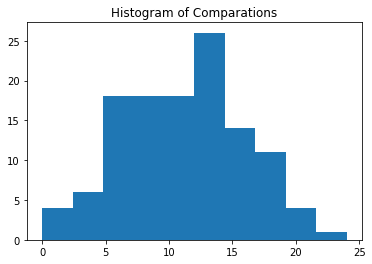

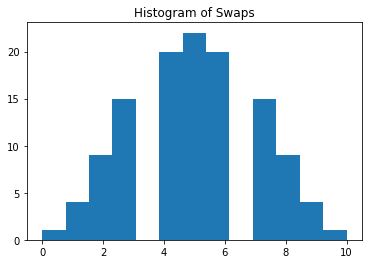

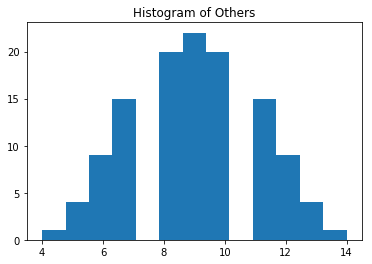

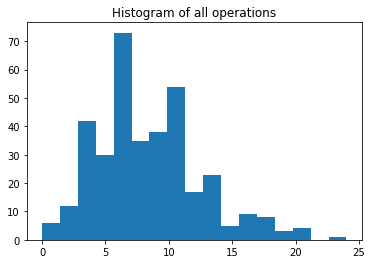

In [5]:
def allPerms(n, perms):
    if(n > 8):
        print("Input too big, try a number like 8 or less")
    comparations = []
    swaps = []
    others = []
    for perm in perms:
        temp = insertionSort(list(perm))
        comparations = comparations + [temp[0]]
        swaps = swaps + [temp[1]]
        others = others + [temp[2]]
    graph(comparations, swaps, others)
    
def samplePerms(n, m):
    comparations = []
    swaps = []
    others = []
    rng = range(n)
    for i in range(m):
        nxt = np.random.permutation(rng)
        temp = insertionSort(nxt)
        comparations = comparations + [temp[0]]
        swaps = swaps + [temp[1]]
        others = others + [temp[2]]
    graph(comparations, swaps, others)

allPerms(5)

Average:
Comparations: 192.6568
Swaps: 95.0198
Others: 114.0198
Distribucion:


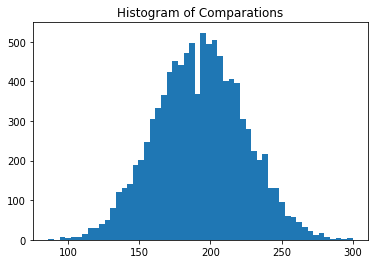

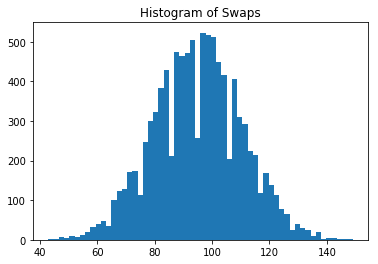

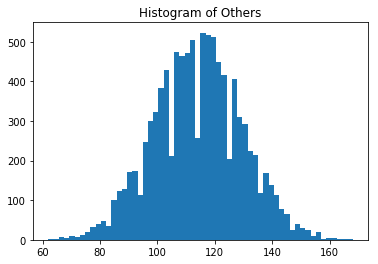

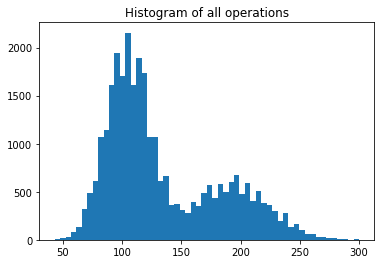

In [6]:
samplePerms(20, 10000)

Se observa una distribución normal en cada una de las variables.